#Classification and Regression
Pranav Murthy
21BBS0059


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics



#Load the dataset

In [43]:
df=pd.read_csv(r"/content/sample_data/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


#Data preprocessing and visualisation

Visualisation

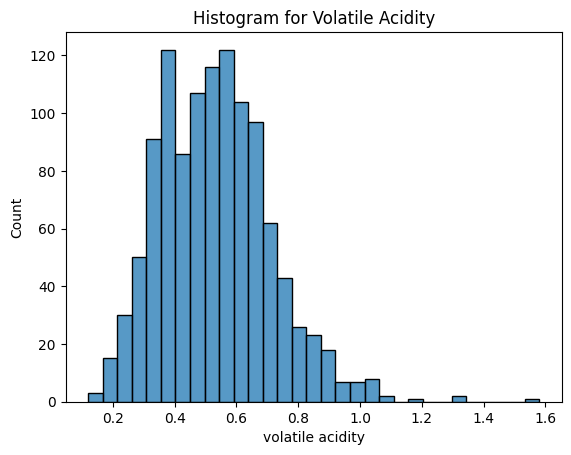

<ipython-input-44-9b991817a53a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fixed acidity'])


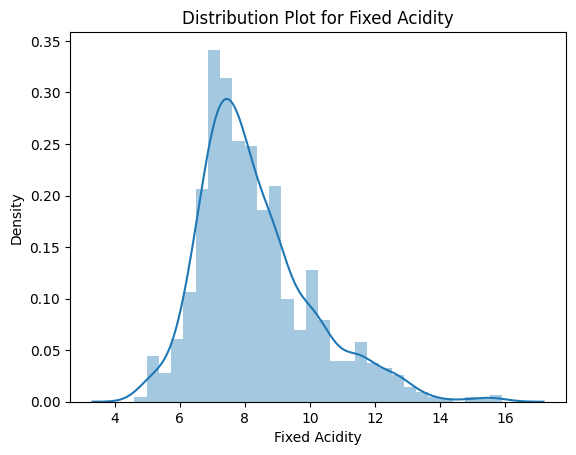

In [44]:
#Univariate

sns.histplot(df['volatile acidity'])
plt.title('Histogram for Volatile Acidity')
plt.show()

sns.distplot(df['fixed acidity'])
plt.title('Distribution Plot for Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.show()

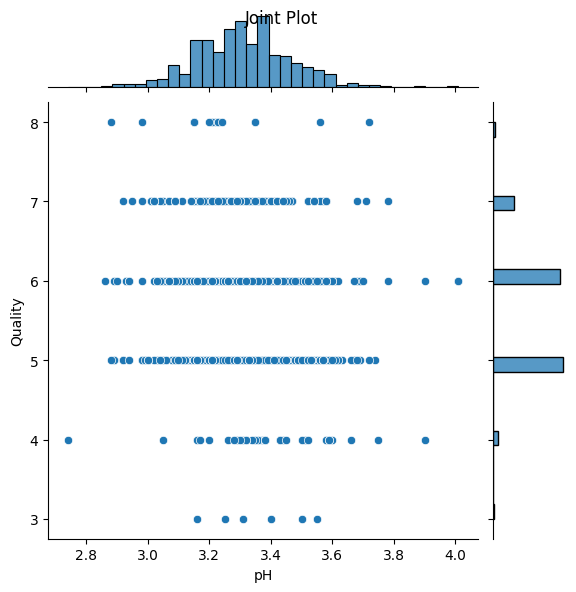

In [45]:
#Bivariate
x= df['pH']
y= df['quality']
g= sns.jointplot(data = df,x= x,y=y)
g.fig.suptitle('Joint Plot',ha="center")
plt.xlabel('pH')
plt.ylabel('Quality')
plt.show()

In [46]:
#Multivariate

num = df.select_dtypes(include=['number']).columns.tolist()
g= sns.pairplot(df, vars=num)
g.fig.suptitle(f'Pairplot between {", ".join(num)}',ha="center")

plt.show()


Output hidden; open in https://colab.research.google.com to view.

Data Processing

In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [48]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


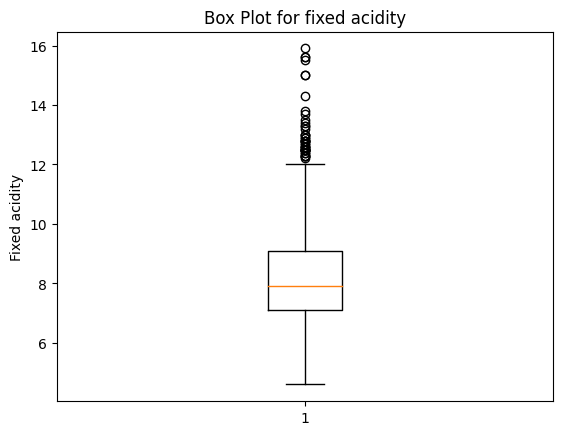

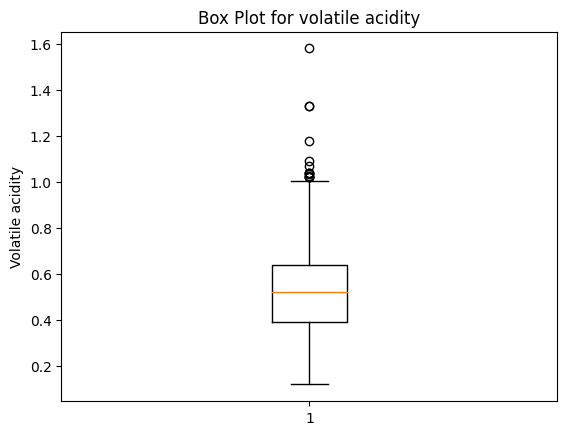

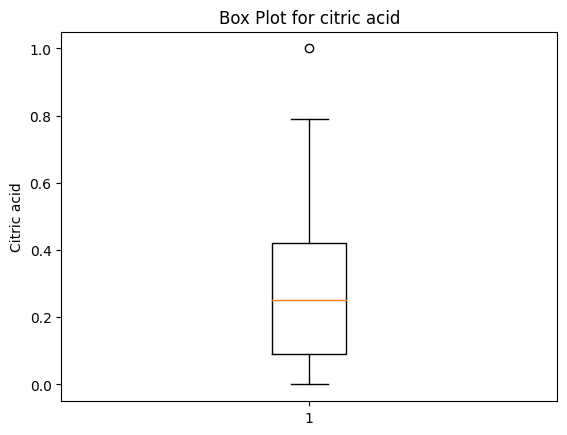

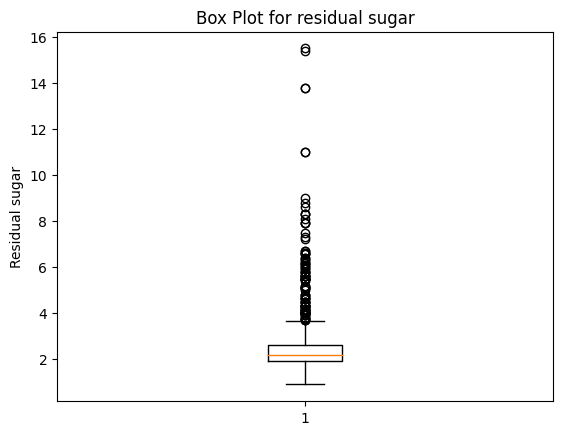

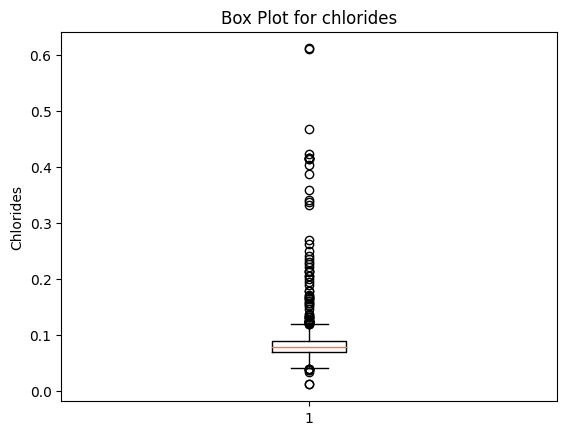

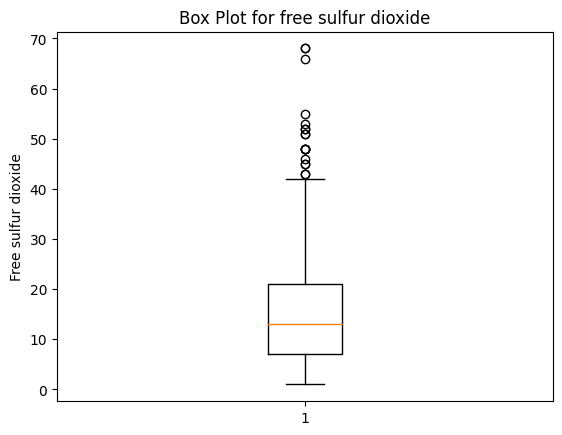

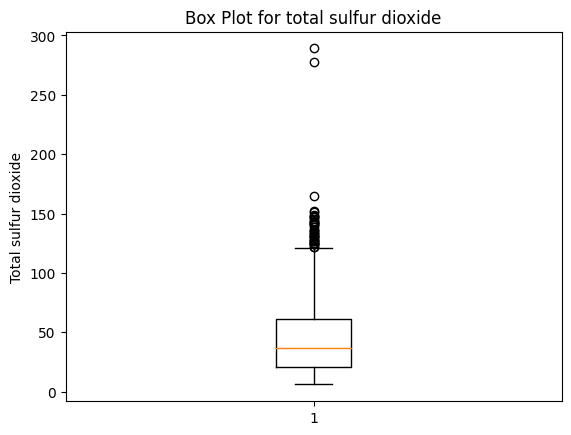

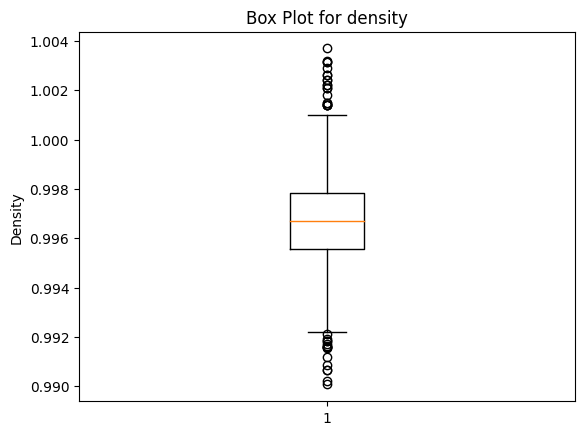

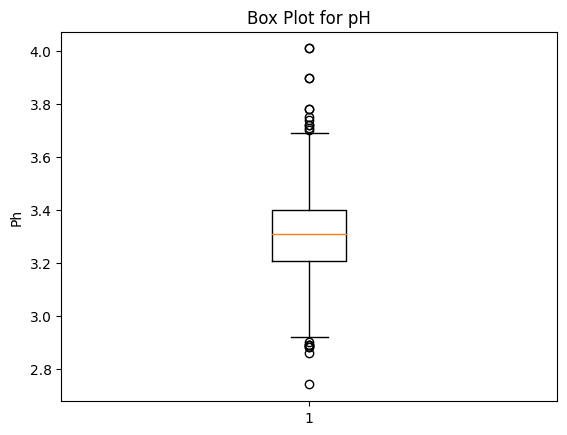

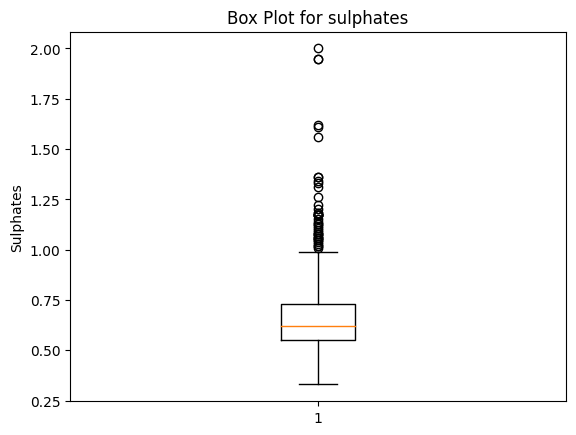

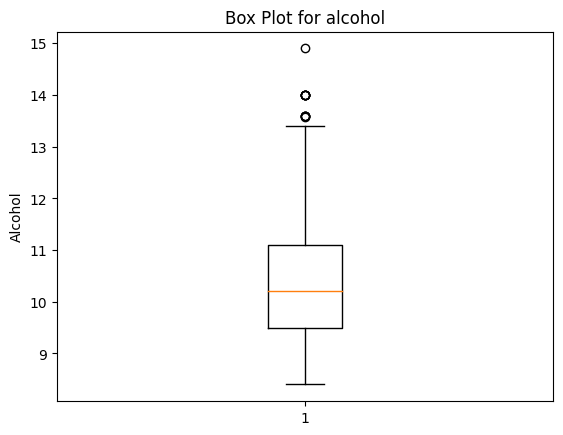

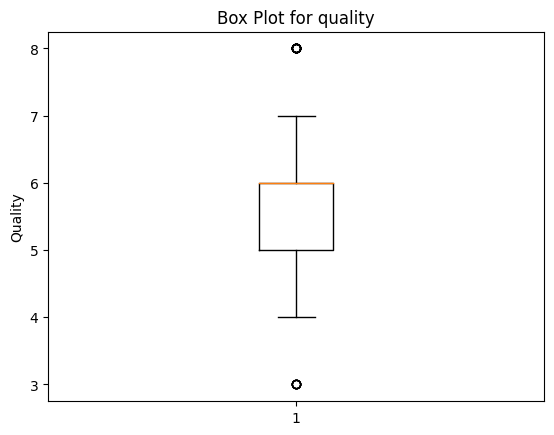

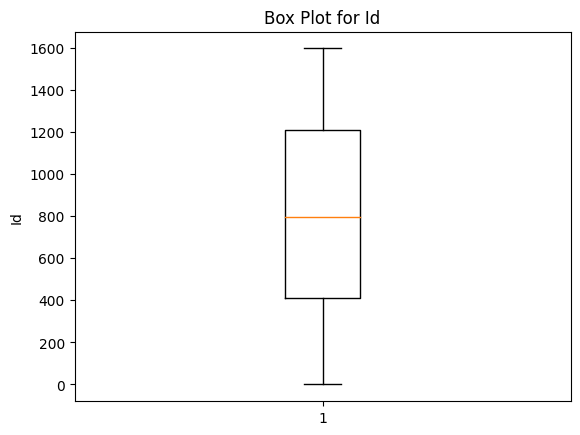

In [50]:
# Finding the outliers and Replacing them with Median
# Replacement of Outliers in Culmen Length.

for i in df.columns.tolist():
    plt.boxplot(df[i])
    plt.title('Box Plot for {}'.format(i))
    plt.ylabel(i.capitalize())
    plt.show()

In [51]:
# Finding the Number of Outliers.

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {}: {}'.format(i, s))

Number of Outliers in fixed acidity: 44
Number of Outliers in volatile acidity: 14
Number of Outliers in citric acid: 1
Number of Outliers in residual sugar: 110
Number of Outliers in chlorides: 77
Number of Outliers in free sulfur dioxide: 18
Number of Outliers in total sulfur dioxide: 40
Number of Outliers in density: 36
Number of Outliers in pH: 20
Number of Outliers in sulphates: 43
Number of Outliers in alcohol: 12
Number of Outliers in quality: 22
Number of Outliers in Id: 0


In [52]:
# Replacing outliers

def replace_outliers(data, column, lower_bound, upper_bound):
    median = data[column].median()
    data[column] = data[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return data

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    df = replace_outliers(df, i, lower_bound, upper_bound)

In [53]:
# Rechecking for the number of outliers.

for i in df.columns.tolist():
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR
    s = 0
    for j in df[i]:
        if j < lb or j > ub:
            s += 1
    print('Number of Outliers in {}: {}'.format(i, s))

Number of Outliers in fixed acidity: 18
Number of Outliers in volatile acidity: 3
Number of Outliers in citric acid: 0
Number of Outliers in residual sugar: 40
Number of Outliers in chlorides: 54
Number of Outliers in free sulfur dioxide: 12
Number of Outliers in total sulfur dioxide: 19
Number of Outliers in density: 2
Number of Outliers in pH: 12
Number of Outliers in sulphates: 22
Number of Outliers in alcohol: 0
Number of Outliers in quality: 0
Number of Outliers in Id: 0


In [54]:
# Check the Correlation of Indpendent Variables with the target

df.corr().quality.sort_values(ascending= False)

quality                 1.000000
alcohol                 0.459722
sulphates               0.392464
citric acid             0.235532
fixed acidity           0.110767
Id                      0.091857
residual sugar          0.015287
pH                     -0.047242
free sulfur dioxide    -0.056814
density                -0.150317
chlorides              -0.160659
total sulfur dioxide   -0.189784
volatile acidity       -0.369923
Name: quality, dtype: float64

In [55]:
# Dependent Variables.

y = df['quality']
y.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64

In [56]:
# Independent Variables.

x=df.drop(columns =['quality'],axis =1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,4


In [57]:
# Scaling

scale =StandardScaler()
x_scaled =pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,-0.492344,1.062675,-1.370017,-0.661422,-0.189576,-0.438967,-0.311719,0.659372,1.409027,-0.635855,-0.982806,-1.735618
1,-0.214306,2.148682,-1.370017,0.971168,1.341766,1.094900,0.944650,0.055500,-0.762710,0.385624,-0.590941,-1.733462
2,-0.214306,1.424678,-1.165313,0.271486,0.924127,-0.000719,0.449717,0.176275,-0.342373,0.130254,-0.590941,-1.731306
3,2.149017,-1.471340,1.495830,-0.661422,-0.259182,0.218405,0.678147,0.780147,-1.042934,-0.465609,-0.590941,-1.729150
4,-0.492344,1.062675,-1.370017,-0.661422,-0.189576,-0.438967,-0.311719,0.659372,1.409027,-0.635855,-0.982806,-1.726993


In [58]:
# Spliting into Training and Splitting Data.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=10)

In [59]:
x_train.shape

(800, 12)

In [60]:
y_train.shape

(800,)

In [61]:
x_test.shape

(343, 12)

In [62]:
y_test.shape

(343,)

#Linear Regression Model

In [63]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict(x_test)
y_predict

array([5.42192327, 5.35855528, 5.79033056, 5.08034577, 5.18728102,
       5.25501363, 6.28446112, 6.39583226, 6.1751112 , 5.56317502,
       5.19591761, 5.09393913, 6.18063727, 5.73394757, 5.51420741,
       5.2771903 , 5.68917799, 5.04247249, 5.50851806, 5.43941229,
       6.05513478, 5.49181512, 6.51977638, 6.30137021, 5.42534924,
       5.61660007, 5.7697541 , 5.64636943, 6.16679823, 5.55795241,
       5.41563986, 5.75984893, 5.18570665, 5.29373109, 5.31615189,
       5.70367545, 6.00159586, 5.58149137, 5.32980283, 6.1536884 ,
       5.36815123, 5.09257177, 5.60764149, 5.33055836, 5.2894273 ,
       5.94194038, 5.51836965, 6.2356241 , 5.35847553, 6.06318165,
       5.55289309, 5.34822999, 6.21266891, 4.87887563, 5.54922282,
       5.77684123, 5.10435924, 5.81987047, 5.19201019, 5.52165208,
       5.57957817, 5.95430013, 5.26166808, 5.32544077, 5.12481993,
       5.22431418, 5.27461048, 5.16518355, 6.52962774, 6.19275489,
       5.71906571, 6.39001732, 6.11329446, 6.1302046 , 5.28000

In [64]:
y_predict1 =lr.predict(x_train)
y_predict1

array([5.52107216, 6.30344544, 6.10273902, 5.38226852, 5.70078656,
       4.94274023, 5.47876771, 5.18634601, 5.83488976, 6.15634075,
       5.28814986, 5.3625629 , 5.98182695, 5.54681927, 4.91573307,
       6.31061224, 5.74454948, 5.99686383, 5.2523525 , 5.72902079,
       4.83176151, 5.54808839, 5.5354188 , 5.64647533, 6.49060099,
       5.5499544 , 4.91119963, 6.09087632, 5.4427377 , 6.04771214,
       5.18258812, 6.41732529, 6.55455344, 5.12134066, 5.90394459,
       6.05847292, 6.29011436, 5.36511601, 5.56817861, 5.25785911,
       5.4845089 , 5.37437519, 6.06841327, 5.57266244, 5.56520495,
       6.17440713, 5.38015084, 5.32761172, 5.73455571, 5.07437288,
       5.46612212, 5.57729462, 5.74502861, 5.47615573, 5.39279812,
       5.87769191, 5.71690932, 6.09545114, 5.40209129, 5.65453199,
       5.2812652 , 6.33841163, 5.72370083, 5.46001252, 5.76683637,
       5.67660737, 6.39389372, 5.68694624, 6.24464507, 5.73104548,
       5.65077226, 5.22443379, 5.94193254, 5.35648409, 5.70368

In [65]:
profit =pd.DataFrame({'Actual Quality':y_test,'Predicted Quality':y_predict})
profit

,Actual Quality,Predicted Quality
67,5.0,5.421923
225,5.0,5.358555
1121,6.0,5.790331
74,5.0,5.080346
43,5.0,5.187281
...,...,...
705,7.0,6.515182
445,5.0,5.136409
562,5.0,5.218991
855,7.0,6.213155


#Evaluation

In [66]:
#R2 Score
print(metrics.r2_score(y_test,y_predict))
print(metrics.r2_score(y_train,y_predict1))

0.4232209258861708
0.3152237324833106


In [67]:
# Mean Square Error.

print(metrics.mean_squared_error(y_test,y_predict))

0.32099879010171845


In [68]:
# Root Mean Square Error.

print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

0.5665675512255519


#Test with random observation

In [69]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,4


In [74]:
data = pd.DataFrame({
    'fixed acidity': [11.2],
    'volatile acidity': [0.7],
    'citric acid': [0.00],
    'residual sugar': [2.3],
    'chlorides': [0.075],
    'free sulfur dioxide': [17.5],
    'total sulfur dioxide': [34],
    'density': [0.9970],
    'pH': [3.51],
    'sulphates': [0.56],
    'alcohol': [10],
    'Id':1
})
lr.predict(data)


array([6.10998802])

In [75]:
data = pd.DataFrame({
    'fixed acidity': [7.4],
    'volatile acidity': [0.7],
    'citric acid': [0.00],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide': [11],
    'total sulfur dioxide': [34],
    'density': [0.9978],
    'pH': [3.51],
    'sulphates': [9.4],
    'alcohol': [9.4],
    'Id':4
})
lr.predict(data)

array([7.17915934])